In [4]:
!python -m pip install pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
pd.set_option("display.max_columns", None)

In [7]:
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("../data/raw/german_credit_data.csv")

In [9]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
df["Risk"].describe()

count     1000
unique       2
top       good
freq       700
Name: Risk, dtype: object

In [11]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [12]:
df.shape

(1000, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df["Job"].unique()

array([2, 1, 3, 0])

In [16]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.dropna().reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [19]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [20]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [21]:
df.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

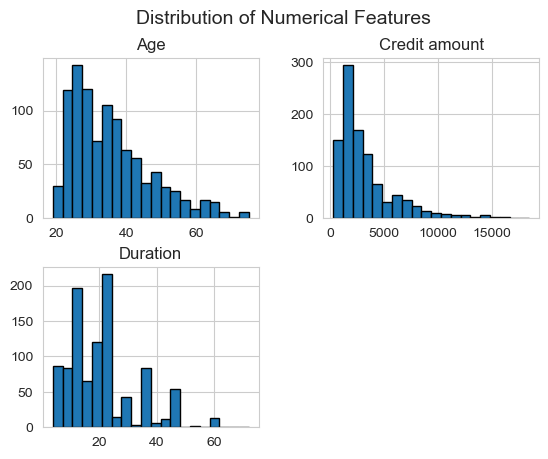

In [22]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14) 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

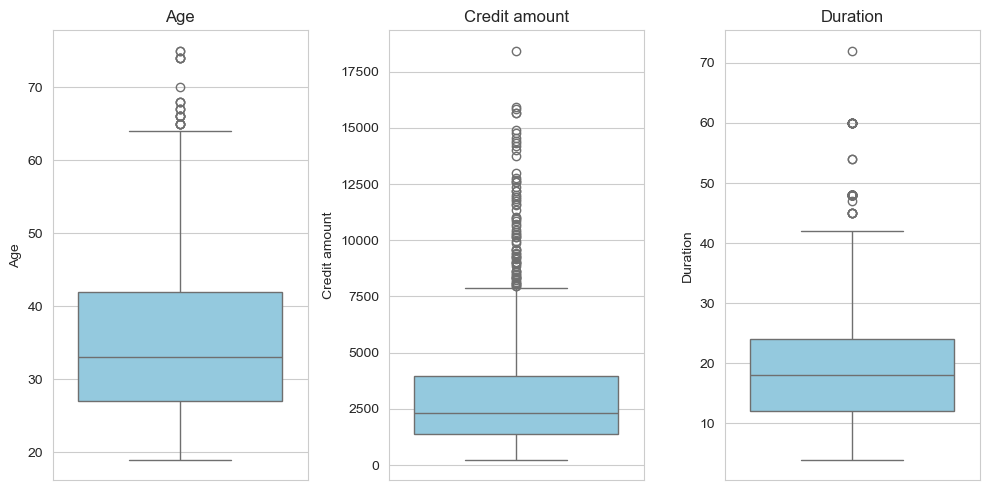

In [24]:
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y= df[col], color = "skyblue")
    plt.title(col)

plt.tight_layout()
plt.show

In [27]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,NaN,10144,60,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,NaN,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
672,42,male,3,own,little,NaN,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [37]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/3683887804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = col, palette = "Set2", order=df[col].value_counts().index)
/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/3683887804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = col, palette = "Set2", order=df[col].value_counts().index)
/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/3683887804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = 

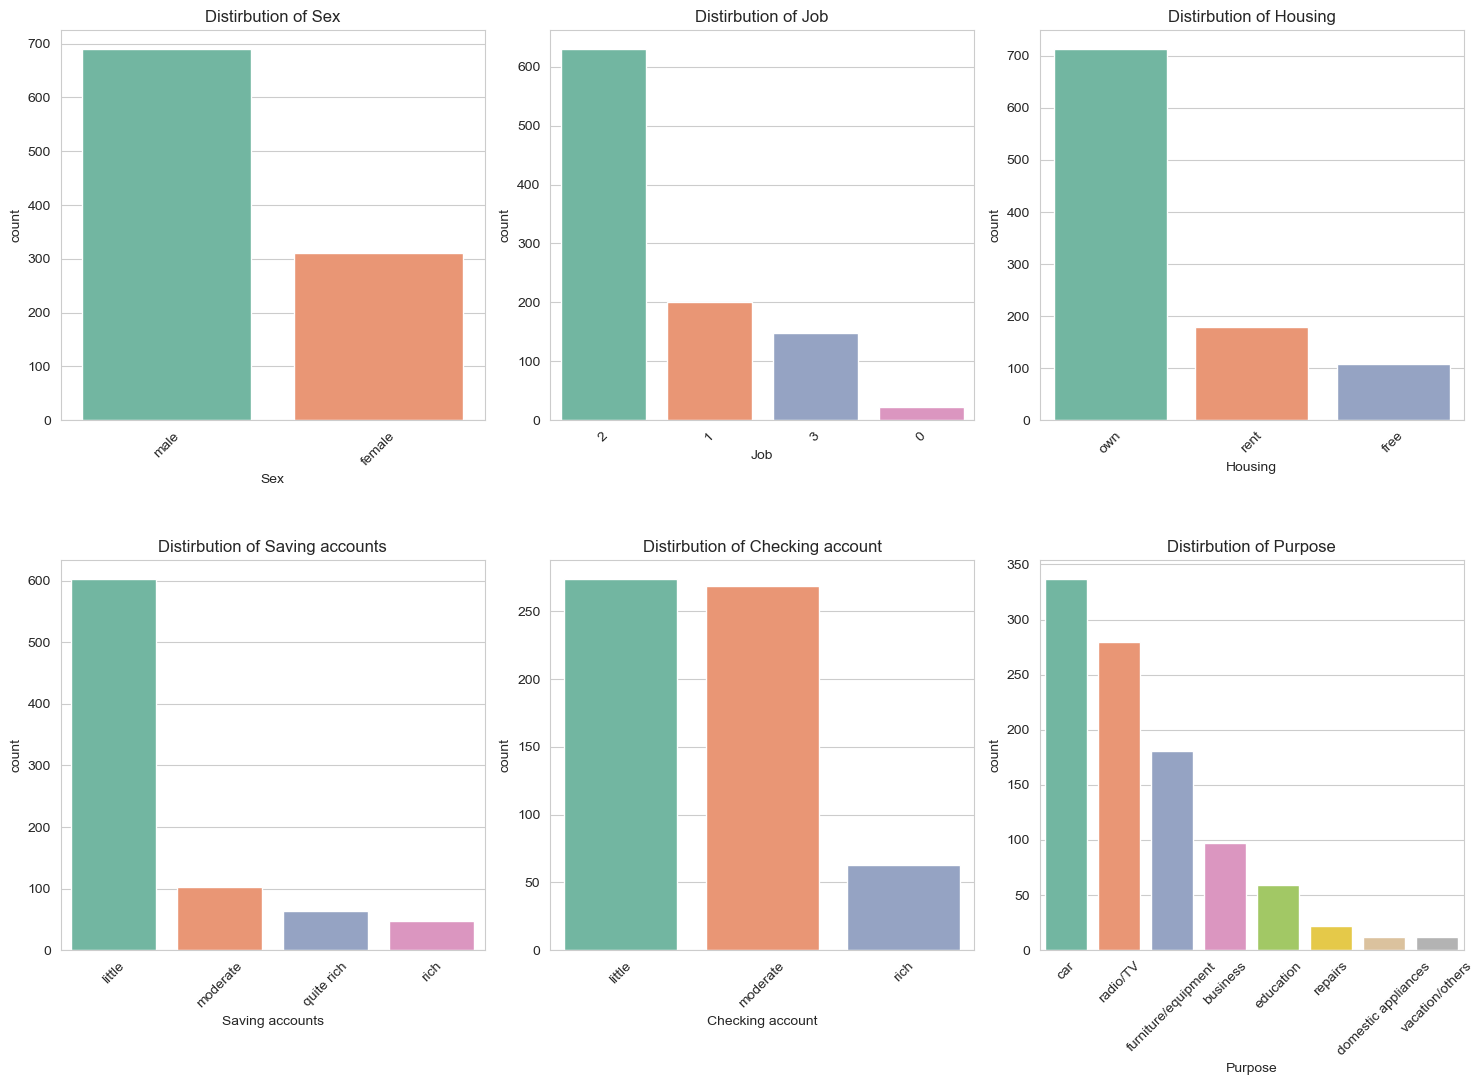

In [40]:
plt.figure(figsize= (15,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x = col, palette = "Set2", order=df[col].value_counts().index)
    plt.title(f"Distirbution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [42]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [43]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


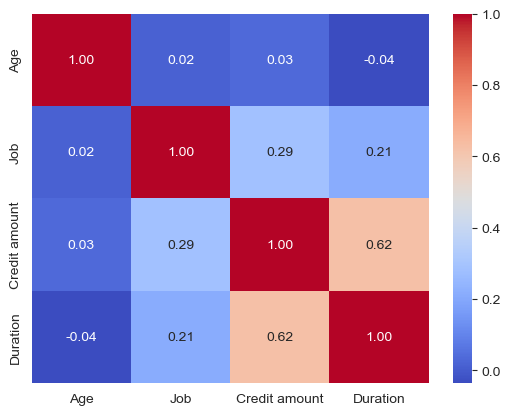

In [44]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [45]:
df.groupby("Job")["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [46]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [47]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


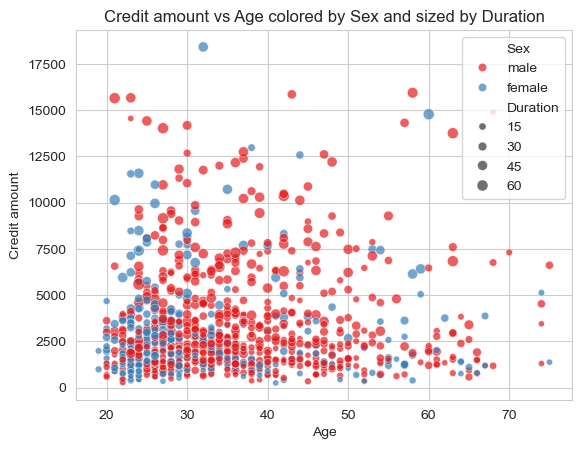

In [48]:
sns.scatterplot(data= df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/3265423323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x="Saving accounts", y="Credit amount", palette = "Pastel1")


Text(0.5, 1.0, 'credit Amount Distribution by Saving Accounts')

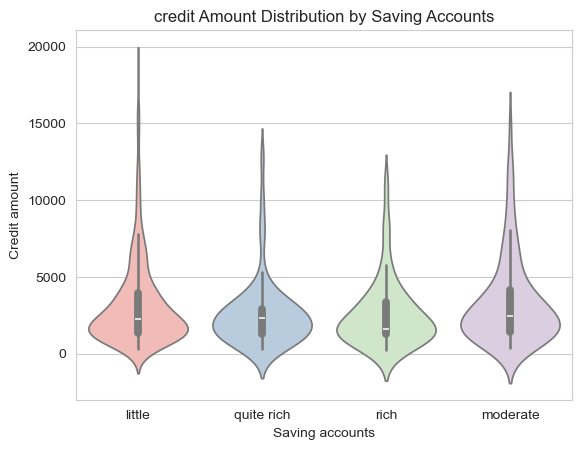

In [51]:
sns.violinplot(data = df, x="Saving accounts", y="Credit amount", palette = "Pastel1")
plt.title("credit Amount Distribution by Saving Accounts")

In [52]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/2591092219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y= col, palette="Pastel2")
/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/2591092219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y= col, palette="Pastel2")
/var/folders/sc/5cm25zvs3tq16khj5slz925m0000gn/T/ipykernel_60778/2591092219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y= col, palette="Pastel2")


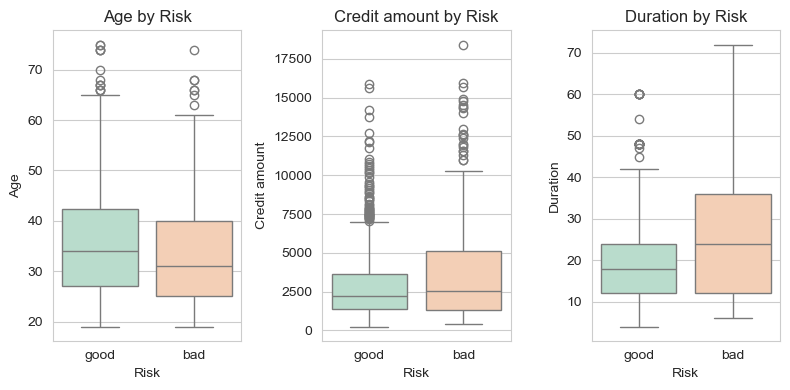

In [58]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3, i+1)
    sns.boxplot(data=df, x="Risk", y= col, palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [59]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [54]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

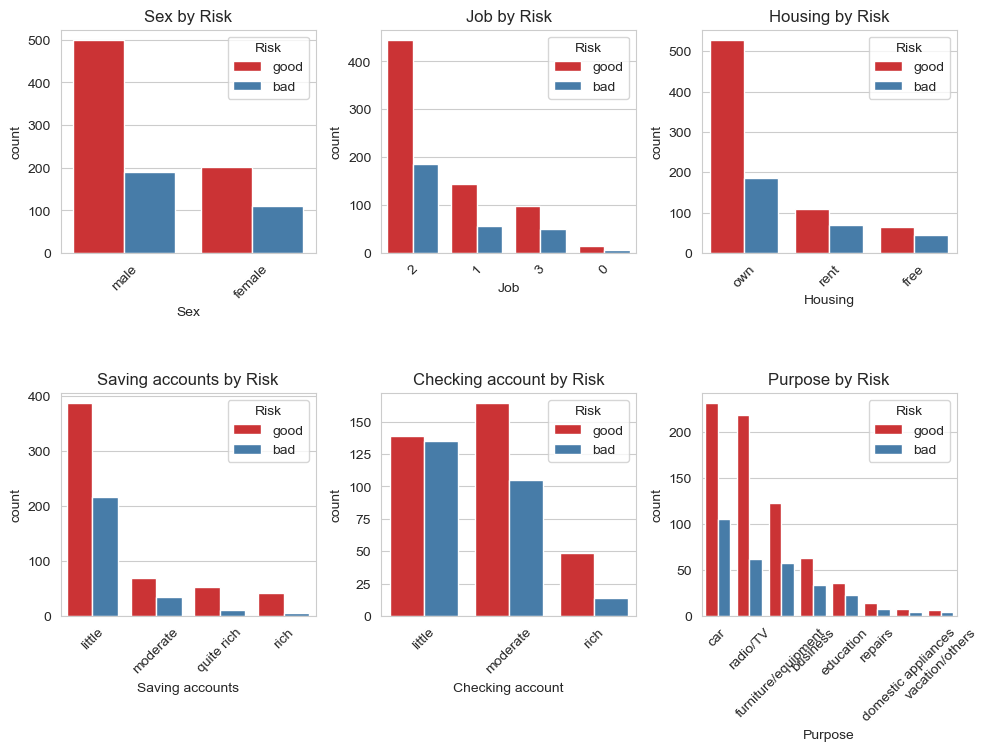

In [62]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x = col, hue="Risk", palette="Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [63]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [64]:
target = "Risk"

In [65]:
df_model = df[features + [target]].copy()

In [66]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,NaN,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,NaN,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [67]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [70]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")

In [68]:
le_dict = {}

In [71]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [ ]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"../Models/{col}_encoder.pkl")

In [73]:
le_target = LabelEncoder()

In [74]:
df_model[target] = le_target.fit_transform(df_model[target])

In [76]:
df_model[target].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [ ]:
joblib.dump(le_target, "../Models/target_encoder.pkl")

In [79]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,4,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,3,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df_model.drop(target, axis = 1)

In [82]:
y = df_model[target]

In [83]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,3,804,12
998,23,1,2,0,0,0,1845,45


In [85]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 1)

In [87]:
X_train.shape

(800, 8)

In [88]:
X_test.shape

(200, 8)

In [90]:

!python -m pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.0 MB/s eta 0:00:00a 0:00:01


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [100]:
def train_model (model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [101]:
dt = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")
dt_param_grid = {
    "max_depth" : [3,5,7,10, None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [102]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [103]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.705


In [104]:
print("Best parameters", params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [105]:
rf = RandomForestClassifier(random_state = 1, class_weight="balanced", n_jobs=-1)

In [106]:
rf_param_grid = {
    "n_estimators": [100,200],
    "max_depth" : [5, 7,10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [107]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [108]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.77


In [109]:
print("Best params", params_rf)

Best params {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [110]:
et = ExtraTreesClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)

In [111]:
et_param_grid = {
    "n_estimators": [100,200],
    "max_depth" : [5, 7,10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [112]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [113]:
print("extra trees accuracy", acc_et)

extra trees accuracy 0.745


In [114]:
print("Best params:", params_et)

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [115]:
xgb = XGBClassifier(random_state = 1,scale_pos_weight = (y_train ==0).sum()/(y_train == 1).sum(), use_label_encoder = False, eval_metric = "logloss")

In [116]:
xgb_param_grid = {
    "n_estimators" : [100,200],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01, 0.1, 0.2],
    "subsample" : [0.7,1],
    "colsample_bytree" : [0.7, 1]
}

In [117]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [20:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [20:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [20:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [20:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

In [118]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.735


In [ ]:
print("Best params", params_xgb)

In [119]:
best_et.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0])

In [ ]:
joblib.dump(best_et, "../Models/extra_trees_credit_model.pkl")

In [121]:
df["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)